In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats

In [2]:
path = "resources/2013_22_Houston_Crime.csv"
data_df = pd.read_csv(path)
data_df

,County,City,Year,Population,Total Offenses
0,Austin,Houston,2013,28802,520
1,Brazoria,Houston,2013,334824,7001
2,Chambers,Houston,2013,32622,795
3,Fort Bend,Houston,2013,606396,10116
4,Galveston,Houston,2013,316982,10504
...,...,...,...,...,...
85,Galveston,Houston,2022,372065,7588
86,Harris,Houston,2022,4788785,209078
87,Montgomery,Houston,2022,670242,9972
88,Liberty,Houston,2022,95334,1413


In [3]:
data_df["Total Offenses"] = pd.to_numeric(data_df["Total Offenses"], errors='coerce')
data_df["Population"] = pd.to_numeric(data_df["Population"], errors='coerce')

data_df["Crime Rate per 100,000"]=round((data_df["Total Offenses"]/data_df["Population"]*100000),2)
data_df

,County,City,Year,Population,Total Offenses,"Crime Rate per 100,000"
0,Austin,Houston,2013,28802,520,1805.43
1,Brazoria,Houston,2013,334824,7001,2090.95
2,Chambers,Houston,2013,32622,795,2437.01
3,Fort Bend,Houston,2013,606396,10116,1668.22
4,Galveston,Houston,2013,316982,10504,3313.75
...,...,...,...,...,...,...
85,Galveston,Houston,2022,372065,7588,2039.43
86,Harris,Houston,2022,4788785,209078,4365.99
87,Montgomery,Houston,2022,670242,9972,1487.82
88,Liberty,Houston,2022,95334,1413,1482.16


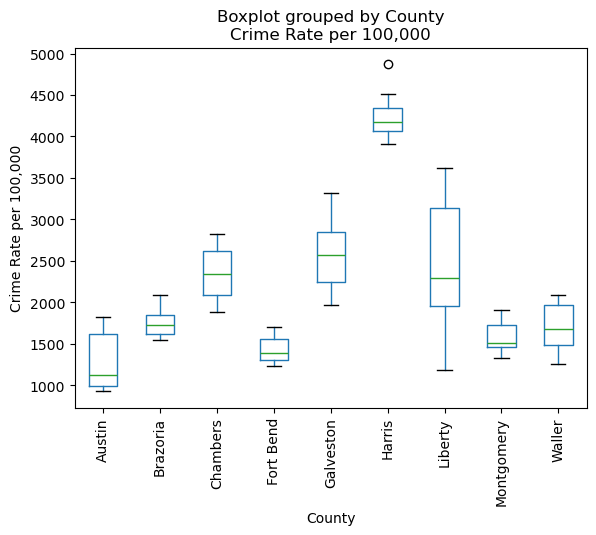

In [4]:
data_df.boxplot(by="County", column="Crime Rate per 100,000", showfliers=True, grid=False)

plt.ylabel("Crime Rate per 100,000")
plt.xticks(rotation='vertical') 
plt.show()

In [5]:
all_outliers = pd.DataFrame()

for county in data_df["County"].unique():
    county_data = data_df[data_df["County"] == county]

    # Calculate IQR
    Q1 = county_data["Crime Rate per 100,000"].quantile(0.25)
    Q3 = county_data["Crime Rate per 100,000"].quantile(0.75)
    IQR = Q3 - Q1

    # Determine outliers
    outliers = county_data[(county_data["Crime Rate per 100,000"] < (Q1 - 1.5 * IQR)) |
                           (county_data["Crime Rate per 100,000"] > (Q3 + 1.5 * IQR))]

    all_outliers = pd.concat([all_outliers, outliers], ignore_index=True)

all_outliers

,County,City,Year,Population,Total Offenses,"Crime Rate per 100,000"
0,Harris,Houston,2013,4349644,212013,4874.26


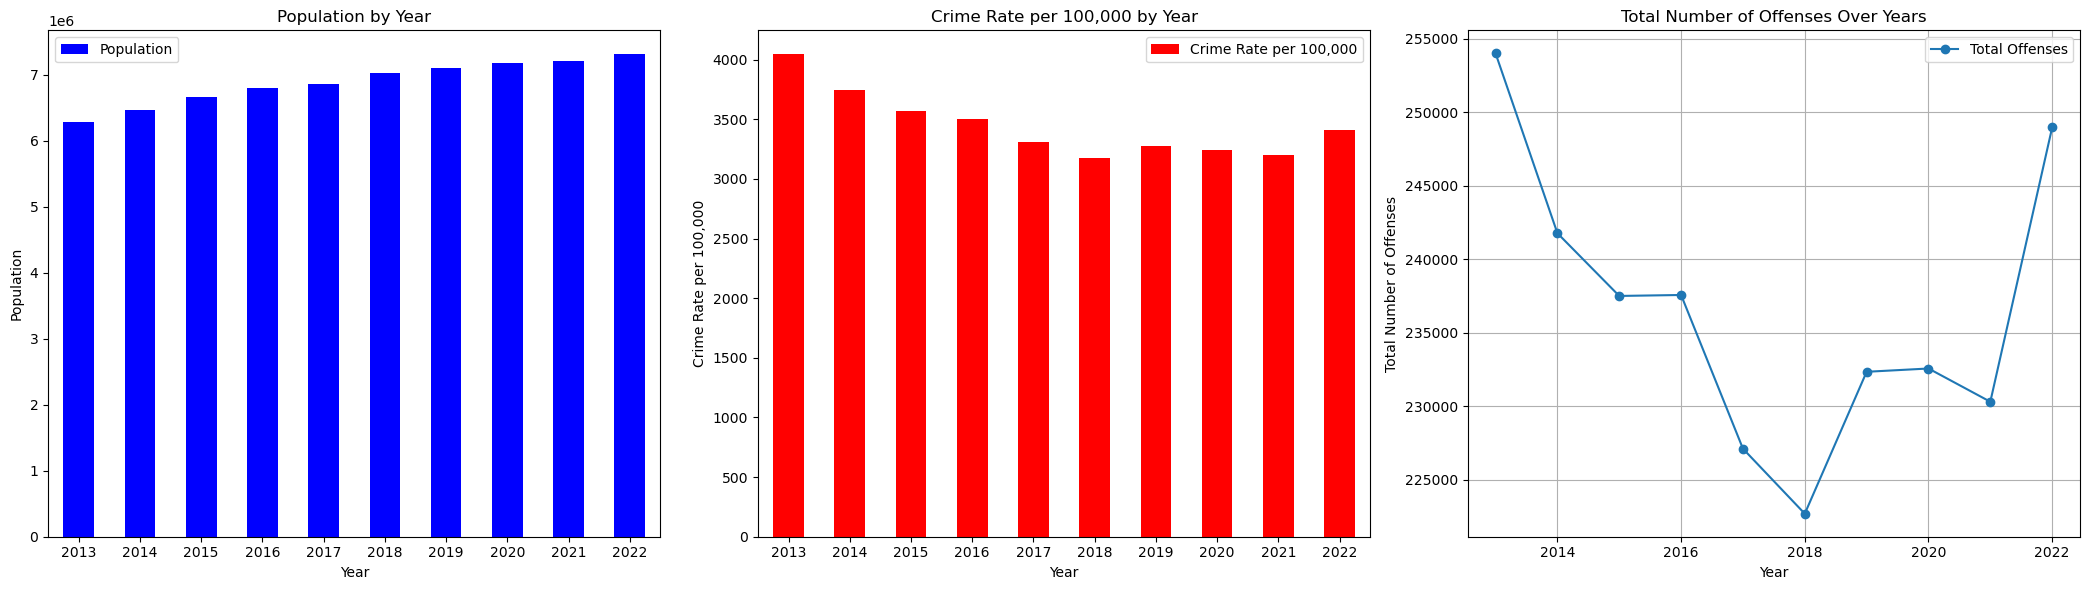

In [6]:
# Create a new consolidated dataframe for metropolitan city.
metropolitan_df= data_df.groupby(["Year", "City"]).agg({
   "Population": "sum", 
    "Total Offenses":"sum",
    }).reset_index()
metropolitan_df['Crime Rate per 100,000'] = (metropolitan_df["Total Offenses"] / metropolitan_df["Population"] * 100000).round(2)

population_df = metropolitan_df[["Year", "Population"]]
crime_rate_df=metropolitan_df[["Year", "Crime Rate per 100,000"]]

# Create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(21, 6))  

# Plot Population data
population_df.plot(kind='bar', x='Year', y='Population', ax=ax1, color='blue', title='Population by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population')
ax1.set_xticklabels(population_df['Year'], rotation=0)  

# Plot Crime Rate data
crime_rate_df.plot(kind='bar', x='Year', y='Crime Rate per 100,000', ax=ax2, color='red', title='Crime Rate per 100,000 by Year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Crime Rate per 100,000')
ax2.set_xticklabels(crime_rate_df['Year'], rotation=0)  

# Plot Population versus Total Offenses over Years
metropolitan_df.plot(kind='line', x='Year', y='Total Offenses', marker='o', ax=ax3)
ax3.set_title('Total Number of Offenses Over Years')
ax3.set_xlabel('Year')
ax3.set_ylabel('Total Number of Offenses')
ax3.grid(True)

# Show the plot
plt.tight_layout()  
plt.show()

C:\Users\jim\AppData\Local\Temp\ipykernel_11248\2162951467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_df["Population Change %"] = round(population_df["Population"].pct_change() * 100,2)
C:\Users\jim\AppData\Local\Temp\ipykernel_11248\2162951467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_rate_df[" Crime Rate Change %"] = round(crime_rate_df["Crime Rate per 100,000"].pct_change() * 100,2)


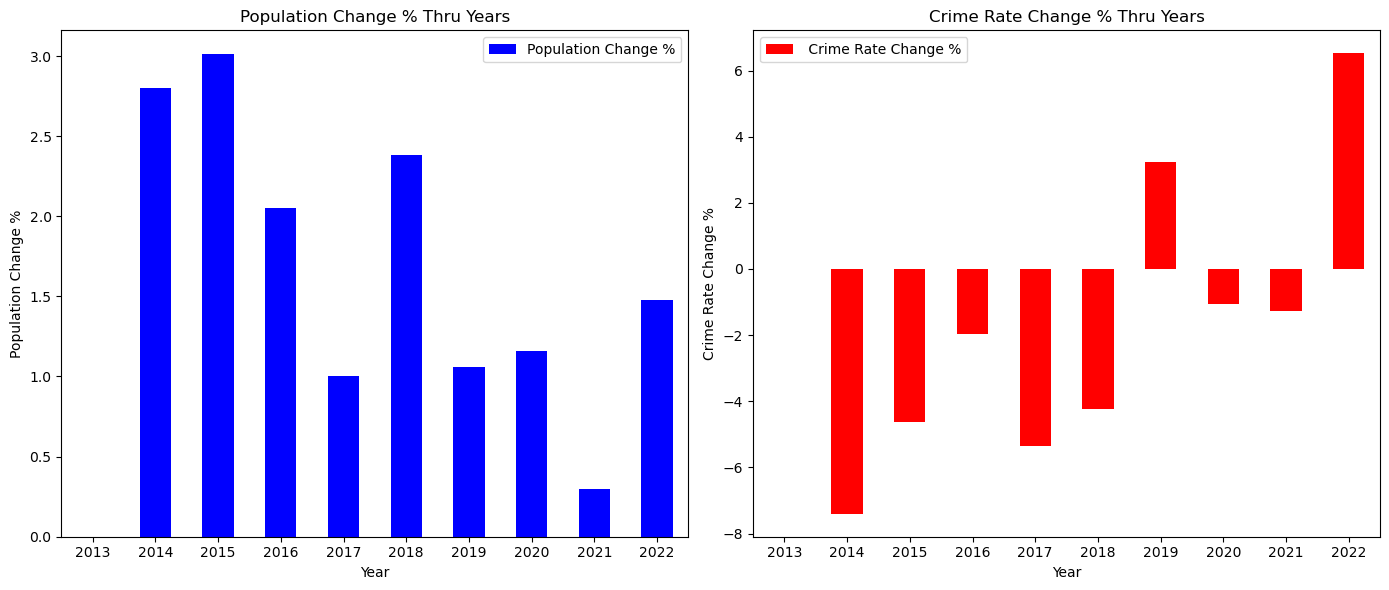

In [7]:

# Calculate the population and crime rate change of the metropolitan city over 10 years 
population_df["Population Change %"] = round(population_df["Population"].pct_change() * 100,2)
crime_rate_df[" Crime Rate Change %"] = round(crime_rate_df["Crime Rate per 100,000"].pct_change() * 100,2)


# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))  

# Plot Population Change %
population_df.plot(kind='bar', x='Year', y='Population Change %', ax=ax1, color='blue', title='Population Change % Thru Years')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population Change %')
ax1.set_xticklabels(population_df['Year'], rotation=0)  

# Plot Crime Rate Change %
crime_rate_df.plot(kind='bar', x='Year', y=' Crime Rate Change %', ax=ax2, color='red', title='Crime Rate Change % Thru Years')
ax2.set_xlabel('Year')
ax2.set_ylabel('Crime Rate Change %')
ax2.set_xticklabels(crime_rate_df['Year'], rotation=0)  

# Show the plot
plt.tight_layout()  
plt.show()

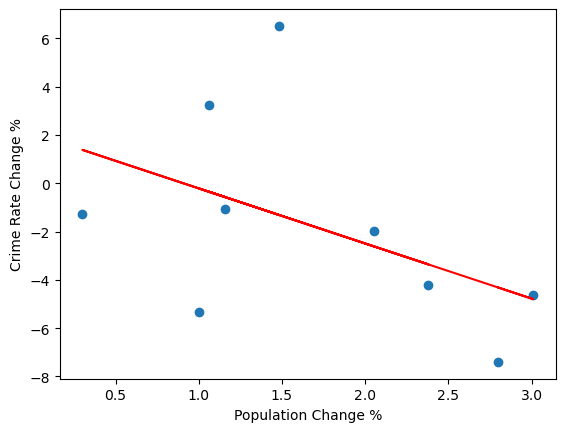

r value is -0.4774414007173949


In [8]:
#Regression Analysis btw the Population Change vs Crime Rate Change 
x_values=population_df["Population Change %"].dropna()
y_values=crime_rate_df[" Crime Rate Change %"].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Population Change %")
plt.ylabel("Crime Rate Change %")
plt.show()
print(f"r value is {rvalue}")

In [9]:
#Create two separate dataframes for covid and non-covid years
covid_years=[2020,2021]
crime_rate_covid_df=crime_rate_df[crime_rate_df["Year"].isin(covid_years)]
mean_crime_rate_covid = crime_rate_covid_df["Crime Rate per 100,000"].mean()
mean_crime_rate_covid

3220.385

In [10]:
crime_rate_non_covid_df=crime_rate_df[~crime_rate_df["Year"].isin(covid_years)]
mean_crime_rate_non_covid = crime_rate_non_covid_df["Crime Rate per 100,000"].mean()
mean_crime_rate_non_covid 

3503.2025

In [11]:
# Running t-test on two independent population on null  hypothesis
t_stat, p_value=stats.ttest_ind(crime_rate_covid_df["Crime Rate per 100,000"],crime_rate_non_covid_df["Crime Rate per 100,000"], equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -2.7689656008955725
P-value: 0.025864955805063674
